Training with CustomSVDInitializer...
Epoch 1/10
469/469 [==============================] - 8s 4ms/step - loss: 1.1758 - accuracy: 0.5919 - val_loss: 0.7401 - val_accuracy: 0.7803
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.8105 - val_loss: 0.5498 - val_accuracy: 0.8485
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5306 - accuracy: 0.8490 - val_loss: 0.4921 - val_accuracy: 0.8624
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.8627 - val_loss: 0.4444 - val_accuracy: 0.8795
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.8709 - val_loss: 0.4319 - val_accuracy: 0.8731
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8799 - val_loss: 0.4121 - val_accuracy: 0.8802
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4113 - accuracy: 0.8812 - val_loss

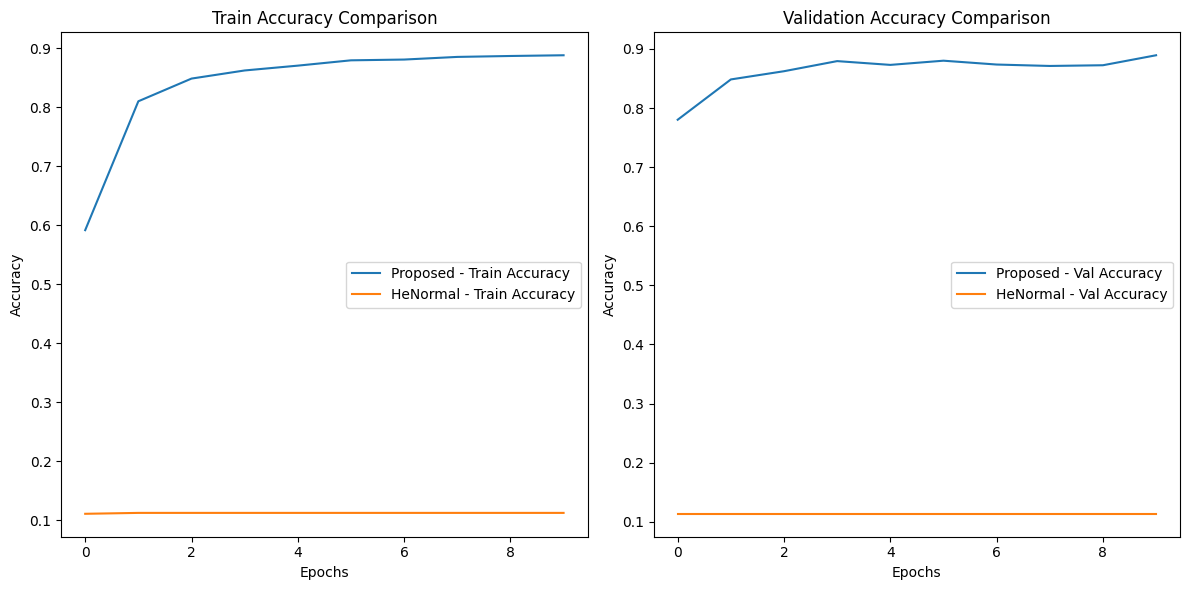

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import Initializer, HeNormal


def gs(X):
    Q, R = np.linalg.qr(X)
    return Q
def al1(eps, nbr):
    org_x = np.ones(nbr)
    X = []
    for i in range(nbr):
        y = np.zeros(nbr)
        y[i] = eps
        x = org_x + y
        X.append(x)
    X = np.array(X)
    Y = gs(X)
    return Y
class CustomSVDInitializer(Initializer):
    def __init__(self, eps=0.1):
        self.eps = eps
    def __call__(self, shape, dtype=None):
        initial_weights = np.random.randn(shape[0], shape[1]).astype(np.float32)
        s_ = np.zeros((shape[0], shape[1]))
        m = min(shape[0], shape[1])
        for i in range(m):
            s_[i][i] = 1
        u_ = np.linalg.matrix_power(al1(self.eps, shape[0]), 1)
        v_ = np.linalg.matrix_power(al1(self.eps, shape[1]), 1)
        new_weights = u_ @ s_ @ v_.T
        return new_weights


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  


def create_model(initializer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  
    for _ in range(100): 
        model.add(Dense(6, activation='relu', kernel_initializer=initializer))
    model.add(Dense(10, activation='softmax'))  
    return model

svd_train_acc, svd_val_acc = [], []
he_train_acc, he_val_acc = [], []

print("Training with CustomSVDInitializer...")
model_svd = create_model(CustomSVDInitializer(eps=0.1))
model_svd.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
history_svd = model_svd.fit(X_train, y_train, epochs=10, batch_size=128, 
                            validation_data=(X_test, y_test), verbose=1)
svd_train_acc = history_svd.history['accuracy']
svd_val_acc = history_svd.history['val_accuracy']

print("\nTraining with HeNormal Initializer...")
model_he = create_model(HeNormal())
model_he.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
history_he = model_he.fit(X_train, y_train, epochs=10, batch_size=128, 
                          validation_data=(X_test, y_test), verbose=1)
he_train_acc = history_he.history['accuracy']
he_val_acc = history_he.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(svd_train_acc, label='Proposed - Train Accuracy')
plt.plot(he_train_acc, label='HeNormal - Train Accuracy')
plt.title("Train Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(svd_val_acc, label='Proposed - Val Accuracy')
plt.plot(he_val_acc, label='HeNormal - Val Accuracy')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


Training with CustomSVDInitializer...
Epoch 1/50
469/469 [==============================] - 1s 1ms/step - loss: 1.8954 - accuracy: 0.2910 - val_loss: 1.6835 - val_accuracy: 0.3545
Epoch 2/50
469/469 [==============================] - 0s 924us/step - loss: 1.5741 - accuracy: 0.4128 - val_loss: 1.4977 - val_accuracy: 0.4398
Epoch 3/50
469/469 [==============================] - 0s 901us/step - loss: 1.4439 - accuracy: 0.4573 - val_loss: 1.4106 - val_accuracy: 0.4691
Epoch 4/50
469/469 [==============================] - 0s 992us/step - loss: 1.3790 - accuracy: 0.4950 - val_loss: 1.3594 - val_accuracy: 0.5035
Epoch 5/50
469/469 [==============================] - 0s 879us/step - loss: 1.3325 - accuracy: 0.5228 - val_loss: 1.3203 - val_accuracy: 0.5404
Epoch 6/50
469/469 [==============================] - 0s 869us/step - loss: 1.2964 - accuracy: 0.5415 - val_loss: 1.2899 - val_accuracy: 0.5475
Epoch 7/50
469/469 [==============================] - 0s 866us/step - loss: 1.2697 - accuracy: 0.557

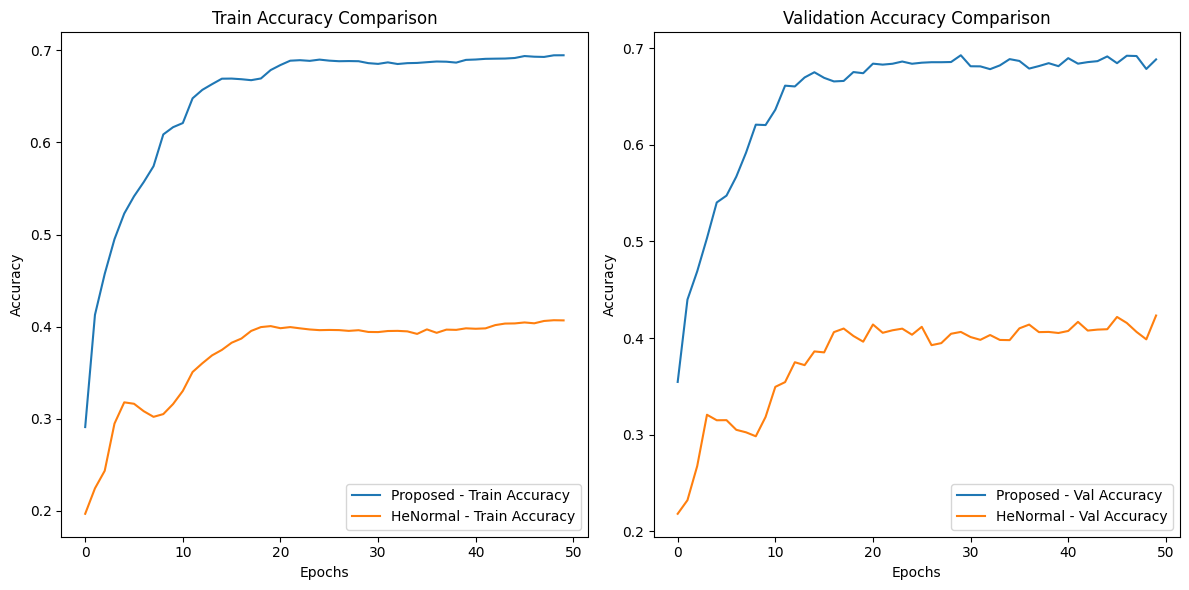

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.initializers import Initializer, HeNormal


# Proposed Method
def gs(X):
    Q, R = np.linalg.qr(X)
    return Q
def al1(eps, nbr):
    org_x = np.ones(nbr)
    X = []
    for i in range(nbr):
        y = np.zeros(nbr)
        y[i] = eps
        x = org_x + y
        X.append(x)
    X = np.array(X)
    Y = gs(X)
    return Y
class CustomSVDInitializer(Initializer):
    def __init__(self, eps=0.1):
        self.eps = eps
    def __call__(self, shape, dtype=None):
        initial_weights = np.random.randn(shape[0], shape[1]).astype(np.float32)
        s_ = np.zeros((shape[0], shape[1]))
        m = min(shape[0], shape[1])
        for i in range(m):
            s_[i][i] = 1
        u_ = np.linalg.matrix_power(al1(self.eps, shape[0]), 1)
        v_ = np.linalg.matrix_power(al1(self.eps, shape[1]), 1)
        new_weights = u_ @ s_ @ v_.T
        return new_weights


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  


def create_model(initializer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  
    for _ in range(4): 
        model.add(Dense(2, activation='relu', kernel_initializer=initializer))
    model.add(Dense(10, activation='softmax'))  
    return model

svd_train_acc, svd_val_acc = [], []
he_train_acc, he_val_acc = [], []

print("Training with CustomSVDInitializer...")
model_svd = create_model(CustomSVDInitializer(eps=0.1))
model_svd.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
history_svd = model_svd.fit(X_train, y_train, epochs=50, batch_size=128, 
                            validation_data=(X_test, y_test), verbose=1)
svd_train_acc = history_svd.history['accuracy']
svd_val_acc = history_svd.history['val_accuracy']

print("\nTraining with HeNormal Initializer...")
model_he = create_model(HeNormal())
model_he.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
history_he = model_he.fit(X_train, y_train, epochs=50, batch_size=128, 
                          validation_data=(X_test, y_test), verbose=1)
he_train_acc = history_he.history['accuracy']
he_val_acc = history_he.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(svd_train_acc, label='Proposed - Train Accuracy')
plt.plot(he_train_acc, label='HeNormal - Train Accuracy')
plt.title("Train Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(svd_val_acc, label='Proposed - Val Accuracy')
plt.plot(he_val_acc, label='HeNormal - Val Accuracy')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
